In [3]:
from causalimpact import CausalImpact

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [4]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import arma_generate_sample
import matplotlib

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 6)

np.random.seed(1)

x1 = arma_generate_sample(ar=[0.999], ma=[0.9], nsample=100) + 100
y = 1.2 * x1 + np.random.randn(100)

y[71:100] = y[71:100] + 10
data = pd.DataFrame(np.array([y, x1]).T, columns=["y","x1"])

In [5]:
data.shape
data.head()

,y,x1
0,121.308920,101.463374
1,120.563149,99.448868
2,119.832495,99.524170
3,119.433612,99.033362
4,119.840664,100.779647


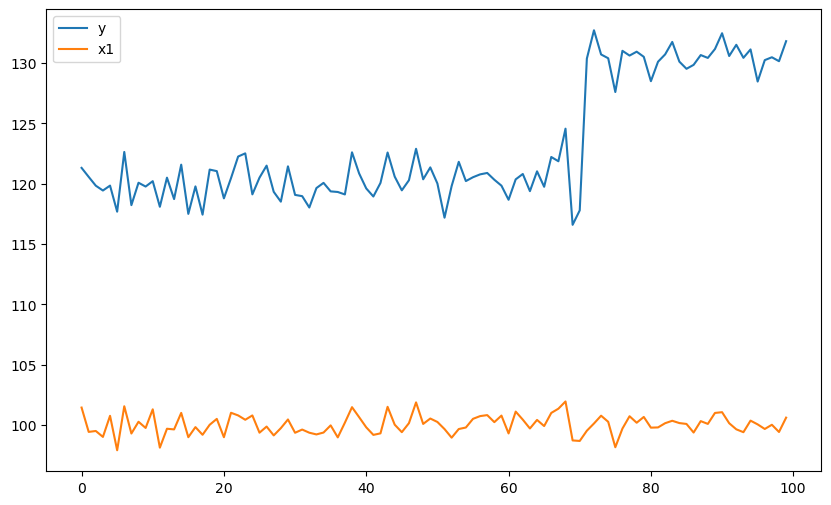

In [12]:
data.plot();

In [8]:
pre_period = [0,69]
post_period = [71,99]

impact = CausalImpact(data, pre_period, post_period)


In [10]:
impact.run()

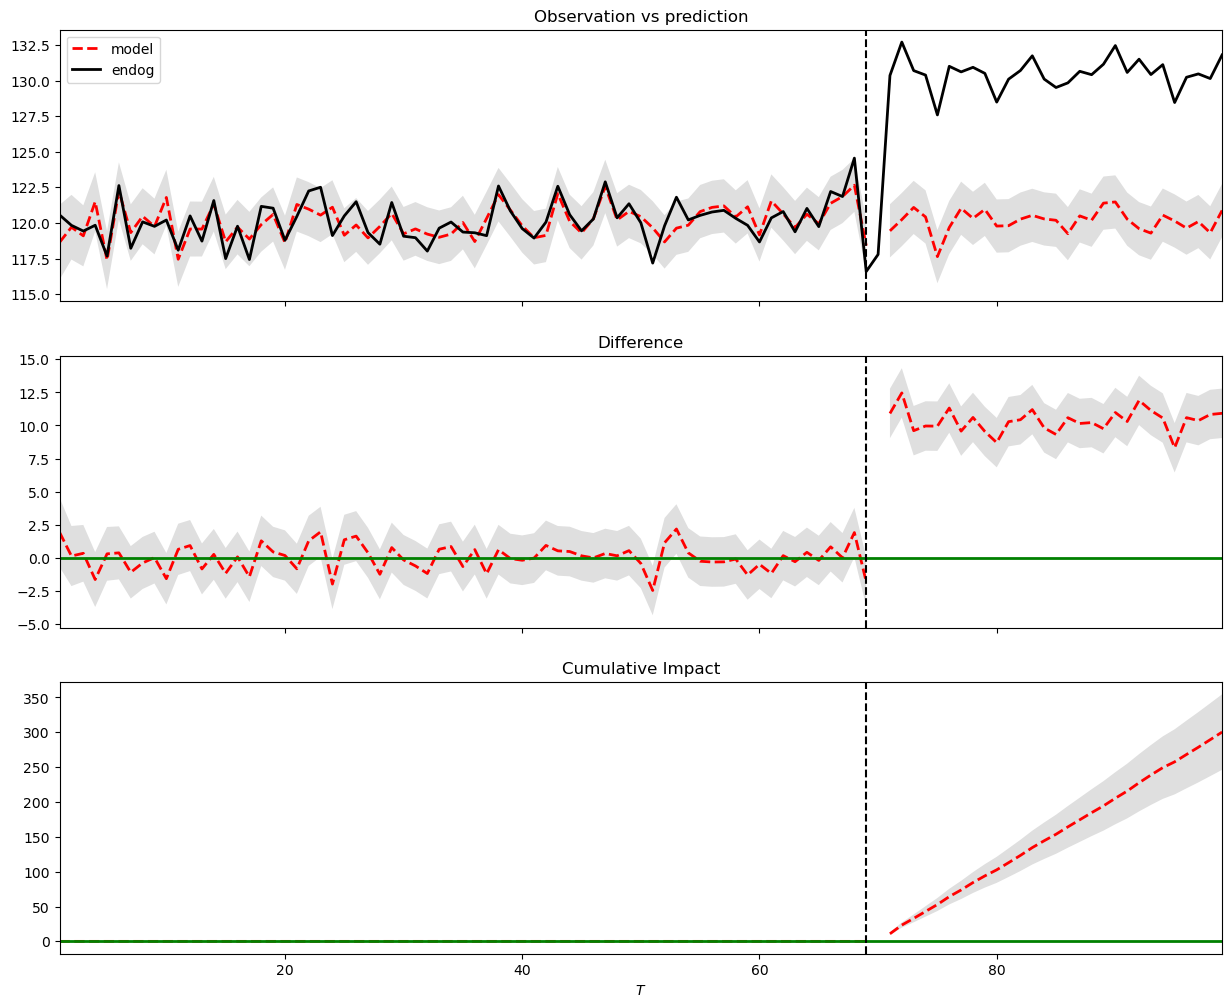

In [11]:
impact.plot()
